# Data from 3D building LoD2

Use the data from 3D building LoD2 to generate data (including volume) via FME, and output geojson data<br/>
Where (<../Test data/690_5336.gml>) is the originial citygml data from open data source

In [2]:
import geopandas as gpd
import random

## Data: a block in Munich for trial

### The information about the data

In [9]:
# read the data file and print the first few rows and a random sample
gdf = gpd.read_file("../Test data/001test.geojson")
print(gdf.head())
print(gdf.sample(1))

Skipping field citygml_level_of_detail: unsupported OGR type: 5


            gml_id                                 gml_parent_id  \
0  DEBY_LOD2_59962  fme-gen-e77c37af-fc0c-4891-afdf-24a30e8baaa0   
1  DEBY_LOD2_59986  fme-gen-e77c37af-fc0c-4891-afdf-24a30e8baaa0   
2  DEBY_LOD2_59987  fme-gen-e77c37af-fc0c-4891-afdf-24a30e8baaa0   
3  DEBY_LOD2_59988  fme-gen-e77c37af-fc0c-4891-afdf-24a30e8baaa0   
4  DEBY_LOD2_59989  fme-gen-e77c37af-fc0c-4891-afdf-24a30e8baaa0   

                            citygml_target_uri citygml_feature_role gml_name  \
0  http://www.opengis.net/citygml/building/1.0     cityObjectMember     None   
1  http://www.opengis.net/citygml/building/1.0     cityObjectMember     None   
2  http://www.opengis.net/citygml/building/1.0     cityObjectMember     None   
3  http://www.opengis.net/citygml/building/1.0     cityObjectMember     None   
4  http://www.opengis.net/citygml/building/1.0     cityObjectMember     None   

  citygml_creationDate citygml_function citygml_roof_type  \
0           2021-04-20       31001_9998          

In [36]:
# print a random row to see all columns
print(gdf.iloc[random.randint(0, len(gdf)-1)])
# 1. gml_id
# 2. gml_parent_id
# 3. citygml_target_uri
# 4. citygml_feature_role
# 5. gml_name
# 6. citygml_creationDate
# 7. citygml_function
# 8. citygml_roof_type
# 9. citygml_measured_height
# 10. citygml_measured_height_units
# 11. citygml_storeys_above_ground
# 12. Ground Height Data Source
# 13. Roof Height Data Source
# 14. Location Data Source
# 15. Municipality Key
# 16. Geometry Type 2D Reference
# 17. Floor Plan Updates 
# 18. Roof Height
# 19. Ground Height
# 20. Method
# 21. Lowest Eaves Height of the Building
# 22. _volume

gml_id                                                           DEBY_LOD2_4910345
gml_parent_id                         fme-gen-e77c37af-fc0c-4891-afdf-24a30e8baaa0
citygml_target_uri                     http://www.opengis.net/citygml/building/1.0
citygml_feature_role                                              cityObjectMember
gml_name                                                                      None
citygml_creationDate                                           2018-11-20 00:00:00
citygml_function                                                        31001_1000
citygml_roof_type                                                             1000
citygml_measured_height                                                      6.162
citygml_measured_height_units                                        urn:adv:uom:m
citygml_storeys_above_ground                                                     2
DatenquelleBodenhoehe                                                         1100
Date

In [ ]:
# Summary statistics and info about the GeoDataFrame

# List all column names
print(f"The name of attributes {gdf.columns}")

# Get summary info
print(gdf.info())

# View all data
print(f"The number of objects: {gdf.shape[0]}")

# The summary statistics for numerical columns
print(gdf.describe())

# Display column names in a formatted way
print("\n=== GeoDataFrame Columns ===")
for i, col in enumerate(gdf.columns, 1):
    print(f"{i:2d}. {col}")
print("=" * 25)

# Optional: Show column types as well
print("\n=== Columns with Data Types ===")
for col, dtype in gdf.dtypes.items():
    print(f"{col:<30} : {dtype}")
print("=" * 40)

lowest_volume_idx = gdf['_volume'].idxmin()
print(gdf.loc[lowest_volume_idx])

gdf_v_less350 = gdf[gdf["_volume"] < 350]
gdf_v_less350.shape


The name of attributes Index(['gml_id', 'gml_parent_id', 'citygml_target_uri', 'citygml_feature_role',
       'gml_name', 'citygml_creationDate', 'citygml_function',
       'citygml_roof_type', 'citygml_measured_height',
       'citygml_measured_height_units', 'citygml_storeys_above_ground',
       'DatenquelleBodenhoehe', 'DatenquelleDachhoehe', 'DatenquelleLage',
       'Gemeindeschluessel', 'Geometrietyp2DReferenz', 'Grundrissaktualitaet',
       'HoeheDach', 'HoeheGrund', 'Methode', 'NiedrigsteTraufeDesGebaeudes',
       '_volume', 'geometry'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   gml_id                         6574 non-null   object        
 1   gml_parent_id                  6574 non-null   object        
 2   citygml_target_uri             6574

### Extract info for one building

In [44]:
gdf_v_general = gdf[(gdf["_volume"] >= 3000) & (gdf["_volume"] <= 4000)]
building_test = gdf_v_general.iloc[random.randint(0, len(gdf_v_general)-1)]

In [ ]:
'''
# The problem is the building class now!
'''

# ============================================================================
# Extract Building Data from GeoDataFrame
# ============================================================================

import geopandas as gpd
import random
import numpy as np
from dataclasses import dataclass
from typing import Optional

# ============================================================================
# Updated Building Data Class
# ============================================================================

@dataclass
class Building:
    """
    Data class for building information required for occupant estimation.
    
    Attributes:
        building_id: Unique identifier for the building (gml_id)
        measured_height: Total height of the building in meters (citygml_measured_height)
        storeys_above_ground: Number of floors above ground (citygml_storeys_above_ground)
        volume: Building volume in cubic meters (_volume)
        function: Building function code (citygml_function)
        roof_type: Roof type code (citygml_roof_type)
    """
    building_id: str
    measured_height: str  # Can be empty string '' or numeric value
    storeys_above_ground: str  # Can be empty string '' or numeric value, None means '0'
    volume: Optional[float] = None
    function: Optional[str] = None
    roof_type: Optional[str] = None
    
    def validate(self) -> bool:
        """Check if building has required attributes with valid values"""
        if self.measured_height == '' or self.storeys_above_ground == '':
            return False
        
        try:
            height = float(self.measured_height)
            storeys = float(self.storeys_above_ground)
            return height > 0 and storeys >= 0  # Changed: storeys can be 0
        except (ValueError, TypeError):
            return False
    
    def get_height(self) -> Optional[float]:
        """Safely get building height as float"""
        try:
            return float(self.measured_height) if self.measured_height else None
        except (ValueError, TypeError):
            return None
    
    def get_storeys(self) -> Optional[int]:
        """Safely get number of storeys as int (None becomes 0)"""
        try:
            if not self.storeys_above_ground or self.storeys_above_ground == '':
                return 0
            return int(float(self.storeys_above_ground))
        except (ValueError, TypeError):
            return 0  # Default to 0 if conversion fails
    
    def get_volume(self) -> Optional[float]:
        """Safely get building volume as float"""
        return self.volume if self.volume else None
    
    def get_function(self) -> Optional[str]:
        """Get building function"""
        return self.function if self.function else None
    
    def get_roof_type(self) -> Optional[str]:
        """Get roof type"""
        return self.roof_type if self.roof_type else None


# ============================================================================
# Function to Convert GeoDataFrame Row to Building Object
# ============================================================================

def extract_building_from_geodataframe(
    building_series: gpd.GeoSeries,
    building_id_col: str = 'gml_id',
    height_col: str = 'citygml_measured_height',
    storeys_col: str = 'citygml_storeys_above_ground',
    volume_col: str = '_volume',
    function_col: str = 'citygml_function',
    roof_type_col: str = 'citygml_roof_type'
) -> Building:
    """
    Convert a GeoDataFrame row (pandas Series) to a Building object.
    
    Args:
        building_series: A row from GeoDataFrame (pandas.Series)
        building_id_col: Column name for building ID (gml_id)
        height_col: Column name for measured height (citygml_measured_height)
        storeys_col: Column name for storeys above ground (citygml_storeys_above_ground)
        volume_col: Column name for volume (_volume)
        function_col: Column name for building function (citygml_function)
        roof_type_col: Column name for roof type (citygml_roof_type)
        
    Returns:
        Building object
        
    Example:
        >>> building = extract_building_from_geodataframe(building_test)
        >>> print(building.building_id, building.volume)
    """
    # Helper function to safely convert to string
    def safe_str(value):
        if value is None or (isinstance(value, float) and np.isnan(value)):
            return ''
        return str(value)
    
    # Helper function to safely get float value
    def safe_float(value):
        try:
            if value is None or (isinstance(value, float) and np.isnan(value)):
                return None
            return float(value)
        except (ValueError, TypeError):
            return None
    
    # Helper function for storeys (None becomes '0')
    def safe_storeys(value):
        if value is None or (isinstance(value, float) and np.isnan(value)):
            return '0'
        return str(value)
    
    # Extract values
    building_id = safe_str(building_series.get(building_id_col, ''))
    measured_height = safe_str(building_series.get(height_col, ''))
    storeys_above_ground = safe_storeys(building_series.get(storeys_col, None))  # None -> '0'
    volume = safe_float(building_series.get(volume_col, None))
    function = safe_str(building_series.get(function_col, None)) or None
    roof_type = safe_str(building_series.get(roof_type_col, None)) or None
    
    # Create Building object
    building = Building(
        building_id=building_id,
        measured_height=measured_height,
        storeys_above_ground=storeys_above_ground,
        volume=volume,
        function=function,
        roof_type=roof_type
    )
    
    return building


# ============================================================================
# Function to Extract Multiple Buildings
# ============================================================================

def extract_buildings_from_geodataframe(
    gdf: gpd.GeoDataFrame,
    filter_invalid: bool = True,
    **kwargs
) -> list[Building]:
    """
    Convert entire GeoDataFrame to list of Building objects.
    
    Args:
        gdf: GeoDataFrame containing building data
        filter_invalid: If True, only return valid buildings
        **kwargs: Additional arguments for extract_building_from_geodataframe
        
    Returns:
        List of Building objects
    """
    buildings = []
    
    for idx, row in gdf.iterrows():
        building = extract_building_from_geodataframe(row, **kwargs)
        
        if filter_invalid:
            if building.validate():
                buildings.append(building)
        else:
            buildings.append(building)
    
    return buildings


# ============================================================================
# Export Functions
# ============================================================================

def building_to_dict(building: Building) -> dict:
    """Convert Building object to dictionary for export"""
    return {
        'building_id': building.building_id,
        'measured_height': building.measured_height,
        'storeys_above_ground': building.storeys_above_ground,
        'volume': building.volume,
        'function': building.function,
        'roof_type': building.roof_type,
        'is_valid': building.validate()
    }


def print_building_info(building: Building):
    """Print formatted building information"""
    print("="*70)
    print("BUILDING INFORMATION")
    print("="*70)
    print(f"Building ID:          {building.building_id}")
    print(f"Function:             {building.function if building.function else 'N/A'}")
    print(f"Roof Type:            {building.roof_type if building.roof_type else 'N/A'}")
    print(f"Measured Height:      {building.measured_height} m")
    print(f"Storeys Above Ground: {building.storeys_above_ground}")
    print(f"Volume:               {building.volume:.2f} m³" if building.volume else "Volume: N/A")
    print(f"Valid:                {building.validate()}")
    print("="*70)


# ============================================================================
# USAGE EXAMPLES
# ============================================================================

# Example 1: Extract single building from your test data
building_test_obj = extract_building_from_geodataframe(building_test)
print_building_info(building_test_obj)

# Example 2: Show as dictionary
building_dict = building_to_dict(building_test_obj)
print("\nBuilding as Dictionary:")
print(building_dict)


BUILDING INFORMATION
Building ID:          DEBY_LOD2_4959143
Function:             31001_2000
Roof Type:            1000
Measured Height:      20.71 m
Storeys Above Ground: 6
Volume:               3072.84 m³
Valid:                True

Building as Dictionary:
{'building_id': 'DEBY_LOD2_4959143', 'measured_height': '20.71', 'storeys_above_ground': '6', 'volume': 3072.8378443963597, 'function': '31001_2000', 'roof_type': '1000', 'is_valid': True}


### Run the notebook for calculating the number of people

AREA PER OCCUPANT (m²/person)
          1p     2p    3p    4p    5p    7p
30m²    30.0   15.0  10.0   7.5   6.0   4.3
50m²    50.0   25.0  16.7  12.5  10.0   7.1
70m²    70.0   35.0  23.3  17.5  14.0  10.0
90m²    90.0   45.0  30.0  22.5  18.0  12.9
110m²  110.0   55.0  36.7  27.5  22.0  15.7
130m²  130.0   65.0  43.3  32.5  26.0  18.6
150m²  150.0   75.0  50.0  37.5  30.0  21.4
170m²  170.0   85.0  56.7  42.5  34.0  24.3
190m²  190.0   95.0  63.3  47.5  38.0  27.1
210m²  210.0  105.0  70.0  52.5  42.0  30.0

SUMMARY STATISTICS
           1p      2p     3p     4p     5p     7p
count   10.00   10.00  10.00  10.00  10.00  10.00
mean   120.00   60.00  40.00  30.00  24.00  17.14
std     60.55   30.28  20.18  15.14  12.11   8.65
min     30.00   15.00  10.00   7.50   6.00   4.29
25%     75.00   37.50  25.00  18.75  15.00  10.71
50%    120.00   60.00  40.00  30.00  24.00  17.14
75%    165.00   82.50  55.00  41.25  33.00  23.57
max    210.00  105.00  70.00  52.50  42.00  30.00

OVERALL STATIST

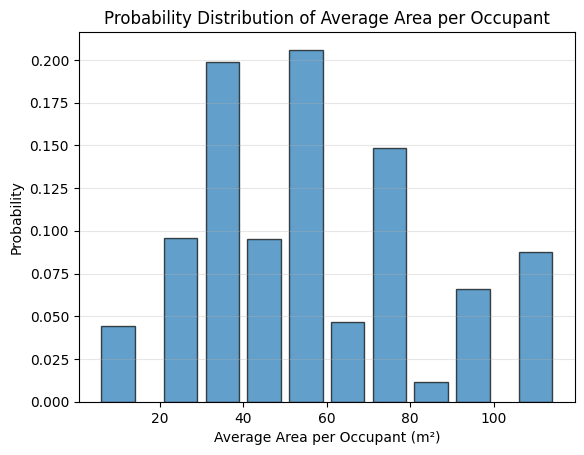


Expected average area per occupant: 56.46 m²/person
The average living area per occupant in Munich is around 51.1 m²/person (from official statistics).
Standard deviation: 26.60 m²/person

NORMALIZED AVERAGE LIVING AREA PER OCCUPANT DISTRIBUTION
Bin Range (m²)       Bin Center      Probability    
----------------------------------------------------------------------
[0, 20)                    10.0       0.044106 ( 4.41%)
[20, 30)                   25.0       0.095905 ( 9.59%)
[30, 40)                   35.0       0.198638 (19.86%)
[40, 50)                   45.0       0.095145 ( 9.51%)
[50, 60)                   55.0       0.205911 (20.59%)
[60, 70)                   65.0       0.046378 ( 4.64%)
[70, 80)                   75.0       0.148697 (14.87%)
[80, 90)                   85.0       0.011719 ( 1.17%)
[90, 100)                  95.0       0.065718 ( 6.57%)
[100, ∞)                  110.0       0.087783 ( 8.78%)
Building validation: True

Average storey height: 3.00 m
Heated area:

In [ ]:
%run ./number_of_people.ipynb

In [ ]:
'''
# --- IGNORE ---
# there is still have some problems unsolved about what is the work flow and what functions are needed
'''
# ============================================================================
# USAGE EXAMPLES
# ============================================================================

# Example 1: Extract single building from your test data
building_test_obj = extract_building_from_geodataframe(building_test)

print("="*70)
print("EXTRACTED BUILDING INFORMATION")
print("="*70)
print(f"Building ID:          {building_test_obj.building_id}")
print(f"Measured Height:      {building_test_obj.measured_height} m")
print(f"Storeys Above Ground: {building_test_obj.storeys_above_ground}")
print(f"Volume:               {building_test_obj.volume:.2f} m³" if building_test_obj.volume else "Volume: N/A")
print(f"Valid:                {building_test_obj.validate()}")
print("="*70)

# Example 2: Use in your model
if building_test_obj.validate() and building_test_obj.volume:

    
    # Step 1: Calculate heated area
    h_g, A_h = av_storey_h_and_h_area_building(building_test_obj, building_test_obj.volume)
    print(f"\nAverage storey height: {h_g:.2f} m")
    print(f"Heated area: {A_h:.2f} m²")
    
    # Step 2: Calculate households
    building_type, n_households, adjusted_A_h = calculate_number_of_households(
        heated_area=A_h,
        storeys=building_test_obj.get_storeys(),
        measured_height=building_test_obj.get_height()
    )
    print(f"\nBuilding type: {building_type}")
    print(f"Number of households: {n_households}")
    print(f"Adjusted heated area: {adjusted_A_h:.2f} m²")
    
    # Step 3: Calculate household areas
    area_pmf = np.array([0.053, 0.173, 0.228, 0.164, 0.115, 0.106, 0.067, 0.035, 0.022, 0.037])
    household_areas = heated_area_per_household(adjusted_A_h, n_households, area_pmf)
    print(f"\nHousehold areas: {[f'{a:.1f}' for a in household_areas]} m²")
    
    # Step 4: Calculate occupants (if occupants_of_area_pmf is defined)
    if 'occupants_of_area_pmf' in globals():
        summary = calculate_building_occupants_summary(household_areas, occupants_of_area_pmf)
        print_building_occupants_report(summary)



EXTRACTED BUILDING INFORMATION
Building ID:          DEBY_LOD2_4959143
Measured Height:      20.71 m
Storeys Above Ground: 6
Volume:               3072.84 m³
Valid:                True

Average storey height: 3.45 m
Heated area: 767.33 m²

Building type: AB
Number of households: 12
Adjusted heated area: 452.73 m²

Household areas: ['37.7', '37.7', '37.7', '37.7', '37.7', '37.7', '37.7', '37.7', '37.7', '37.7', '37.7', '37.7'] m²

BUILDING OCCUPANTS REPORT

Total Occupants:      14 persons
Total Households:     12
Avg Occupants/HH:     1.17 persons/household

----------------------------------------------------------------------
HOUSEHOLD DISTRIBUTION BY SIZE
----------------------------------------------------------------------
1-person households:   11 ( 91.7%)
2-person households:    0 (  0.0%)
3-person households:    1 (  8.3%)
4-person households:    0 (  0.0%)
5+ person households:   0 (  0.0%)

----------------------------------------------------------------------
HOUSEHOLD AREA 

In [ ]:

# Example 3: Extract all buildings from GeoDataFrame
print("\n" + "="*70)
print("EXTRACTING ALL BUILDINGS")
print("="*70)

all_buildings = extract_buildings_from_geodataframe(gdf, filter_invalid=True)
print(f"Total buildings in GeoDataFrame: {len(gdf)}")
print(f"Valid buildings extracted: {len(all_buildings)}")
print(f"Invalid buildings filtered: {len(gdf) - len(all_buildings)}")

# Example 4: Get statistics on extracted buildings
if all_buildings:
    volumes = [b.volume for b in all_buildings if b.volume]
    heights = [b.get_height() for b in all_buildings if b.get_height()]
    storeys = [b.get_storeys() for b in all_buildings if b.get_storeys()]
    
    print("\n" + "="*70)
    print("BUILDING STATISTICS")
    print("="*70)
    print(f"Volume - Mean: {np.mean(volumes):.2f} m³, Min: {np.min(volumes):.2f} m³, Max: {np.max(volumes):.2f} m³")
    print(f"Height - Mean: {np.mean(heights):.2f} m, Min: {np.min(heights):.2f} m, Max: {np.max(heights):.2f} m")
    print(f"Storeys - Mean: {np.mean(storeys):.1f}, Min: {int(np.min(storeys))}, Max: {int(np.max(storeys))}")
    print("="*70)

# Example 5: Export building data to dictionary/JSON format
def building_to_dict(building: Building) -> dict:
    """Convert Building object to dictionary for export"""
    return {
        'building_id': building.building_id,
        'measured_height': building.measured_height,
        'storeys_above_ground': building.storeys_above_ground,
        'volume': building.volume,
        'is_valid': building.validate()
    }

# Export single building
building_dict = building_to_dict(building_test_obj)
print("\n" + "="*70)
print("BUILDING AS DICTIONARY")
print("="*70)
print(building_dict)

# Export multiple buildings
buildings_list = [building_to_dict(b) for b in all_buildings[:5]]  # First 5 buildings
print("\n" + "="*70)
print("FIRST 5 BUILDINGS AS LIST")
print("="*70)
for i, b_dict in enumerate(buildings_list, 1):
    print(f"{i}. ID: {b_dict['building_id']}, Volume: {b_dict['volume']:.2f} m³, Valid: {b_dict['is_valid']}")
print("="*70)

### Further functions to extract all buildings

In [ ]:
'''ignore this part, until for one building the work flow suceeds'''
# Example 2: Show as dictionary
building_dict = building_to_dict(building_test_obj)
print("\nBuilding as Dictionary:")
print(building_dict)

# Example 3: Extract all buildings from GeoDataFrame
print("\n" + "="*70)
print("EXTRACTING ALL BUILDINGS")
print("="*70)

all_buildings = extract_buildings_from_geodataframe(gdf, filter_invalid=True)
print(f"Total buildings in GeoDataFrame: {len(gdf)}")
print(f"Valid buildings extracted: {len(all_buildings)}")
print(f"Invalid buildings filtered: {len(gdf) - len(all_buildings)}")

# Example 4: Statistics on extracted buildings
if all_buildings:
    volumes = [b.volume for b in all_buildings if b.volume]
    heights = [b.get_height() for b in all_buildings if b.get_height()]
    storeys = [b.get_storeys() for b in all_buildings]
    functions = [b.function for b in all_buildings if b.function]
    roof_types = [b.roof_type for b in all_buildings if b.roof_type]
    
    print("\n" + "="*70)
    print("BUILDING STATISTICS")
    print("="*70)
    print(f"Volume - Mean: {np.mean(volumes):.2f} m³, Min: {np.min(volumes):.2f} m³, Max: {np.max(volumes):.2f} m³")
    print(f"Height - Mean: {np.mean(heights):.2f} m, Min: {np.min(heights):.2f} m, Max: {np.max(heights):.2f} m")
    print(f"Storeys - Mean: {np.mean(storeys):.1f}, Min: {int(np.min(storeys))}, Max: {int(np.max(storeys))}")
    
    # Function distribution
    if functions:
        from collections import Counter
        function_counts = Counter(functions)
        print(f"\nBuilding Functions:")
        for func, count in function_counts.most_common():
            print(f"  {func}: {count} ({count/len(all_buildings)*100:.1f}%)")
    
    # Roof type distribution
    if roof_types:
        roof_counts = Counter(roof_types)
        print(f"\nRoof Types:")
        for roof, count in roof_counts.most_common():
            print(f"  {roof}: {count} ({count/len(all_buildings)*100:.1f}%)")
    
    print("="*70)

# Example 5: Show first 5 buildings
print("\n" + "="*70)
print("FIRST 5 BUILDINGS")
print("="*70)
for i, building in enumerate(all_buildings[:5], 1):
    print(f"\n{i}. ID: {building.building_id}")
    print(f"   Function: {building.function}, Roof: {building.roof_type}")
    print(f"   Height: {building.measured_height}m, Storeys: {building.storeys_above_ground}, Volume: {building.volume:.2f}m³")

# Example 6: Filter by function or roof type
print("\n" + "="*70)
print("FILTERING EXAMPLES")
print("="*70)

# Buildings with specific function (e.g., '31001_1000' - residential)
residential = [b for b in all_buildings if b.function and '31001' in b.function]
print(f"Residential buildings: {len(residential)}")

# Buildings with flat roofs
flat_roof = [b for b in all_buildings if b.roof_type and 'flat' in b.roof_type.lower()]
print(f"Buildings with flat roofs: {len(flat_roof)}")

# Buildings with 0 storeys
zero_storeys = [b for b in all_buildings if b.get_storeys() == 0]
print(f"Buildings with 0 storeys: {len(zero_storeys)}")

print("="*70)